In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [222]:
df_train= pd.read_csv(r'C:\Users\HP\Documents\Store Sales Prediction\dataset\archive\Train.csv')
df_test= pd.read_csv(r'C:\Users\HP\Documents\Store Sales Prediction\dataset\Test data(bigsales).csv')

In [223]:
df_train.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [224]:
#df_test

In [225]:
df_test.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 2  Supermarket Type1  
2               Tier 3      Grocery Store  
3               Tier 2  Supermarket Type1  
4               Tier 3  Supermarket Type3

In [226]:
df_test.shape

(5681, 11)

In [227]:
len(df_test['Item_Type'].unique())

16

In [228]:
df_train.shape

(8523, 12)

In [229]:
df_train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [230]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [231]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [232]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [233]:
df_train.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

### Item_Weight is numerical column so we fill it with Mean Imputation

In [234]:
df_train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [235]:
df_train['Item_Weight'] = df_train.groupby('Item_Type')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

In [236]:
df_test['Item_Weight'] = df_test.groupby('Item_Type')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

In [237]:
df_train.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [238]:
df_test.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58     20.75000          Low Fat         0.007565  Snack Foods   
1           FDW14      8.30000              reg         0.038428        Dairy   
2           NCN55     14.60000          Low Fat         0.099575       Others   
3           FDQ58      7.31500          Low Fat         0.015388  Snack Foods   
4           FDY38     12.95504          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 2  Supermarket Type1  
2               Tier 3      Grocery Store  
3               Tier 2  Supermarket Type1  
4               Tier 3  Supermarket Type3

In [239]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [240]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [241]:
df_train['Item_Weight'].describe()

count    8523.000000
mean       12.857890
std         4.232804
min         4.555000
25%         9.310000
50%        12.867061
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

### Outlet_Size is catagorical column so we fill it with Mode Imputation

In [242]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [243]:
df_train['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [244]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace=True)

In [245]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [246]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# selecting feature based on our business requirement

In [247]:
df_train

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998      Medium               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002      Medium               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

In [248]:
df_train['Item_Type'] = df_train['Item_Identifier'].str[:2]

# Mapping of "Fat Content"
fat_content_mapping = {'Low Fat': 'Low', 'Regular': 'Reg', 'low fat': 'Low', 'LF': 'Low', 'reg': 'Reg', 'Non-Edible': 'Non-edible'}
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].map(fat_content_mapping)

In [249]:
df_train['Item_Fat_Content'].unique()

array(['Low', 'Reg'], dtype=object)

In [250]:
df_train.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility Item_Type  \
0           FDA15         9.30              Low         0.016047        FD   
1           DRC01         5.92              Reg         0.019278        DR   
2           FDN15        17.50              Low         0.016760        FD   
3           FDX07        19.20              Reg         0.000000        FD   
4           NCD19         8.93              Low         0.000000        NC   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   
1   48.2692            OUT018                       2009      Medium   
2  141.6180            OUT049                       1999      Medium   
3  182.0950            OUT010                       1998      Medium   
4   53.8614            OUT013                       1987        High   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0               Tier 1  Supermarket Type1          3735.1380  
1               Tier 3  Supermarket Type2           443.4228  
2               Tier 1  Supermarket Type1          2097.2700  
3               Tier 3      Grocery Store           732.3800  
4               Tier 3  Supermarket Type1           994.7052

In [251]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [252]:
df_train.head()

Item_Weight Item_Fat_Content  Item_Visibility Item_Type  Item_MRP  \
0         9.30              Low         0.016047        FD  249.8092   
1         5.92              Reg         0.019278        DR   48.2692   
2        17.50              Low         0.016760        FD  141.6180   
3        19.20              Reg         0.000000        FD  182.0950   
4         8.93              Low         0.000000        NC   53.8614   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998      Medium               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [253]:
df_test.head()

Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  Item_MRP  \
0     20.75000          Low Fat         0.007565  Snack Foods  107.8622   
1      8.30000              reg         0.038428        Dairy   87.3198   
2     14.60000          Low Fat         0.099575       Others  241.7538   
3      7.31500          Low Fat         0.015388  Snack Foods  155.0340   
4     12.95504          Regular         0.118599        Dairy  234.2300   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2007      Medium               Tier 2   
2                       1998      Medium               Tier 3   
3                       2007      Medium               Tier 2   
4                       1985      Medium               Tier 3   

         Outlet_Type  
0  Supermarket Type1  
1  Supermarket Type1  
2      Grocery Store  
3  Supermarket Type1  
4  Supermarket Type3

In [254]:
from datetime import datetime

# Assuming 'Outlet_Establishment_Year' is the column containing establishment years
df_train['Outlet_Years'] = datetime.now().year - df_train['Outlet_Establishment_Year']


In [255]:
df_train.head()

Item_Weight Item_Fat_Content  Item_Visibility Item_Type  Item_MRP  \
0         9.30              Low         0.016047        FD  249.8092   
1         5.92              Reg         0.019278        DR   48.2692   
2        17.50              Low         0.016760        FD  141.6180   
3        19.20              Reg         0.000000        FD  182.0950   
4         8.93              Low         0.000000        NC   53.8614   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998      Medium               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  Outlet_Years  
0  Supermarket Type1          3735.1380            24  
1  Supermarket Type2           443.4228            14  
2  Supermarket Type1          2097.2700            24  
3      Grocery Store           732.3800            25  
4  Supermarket Type1           994.7052            36

In [256]:
df_train

Item_Weight Item_Fat_Content  Item_Visibility Item_Type  Item_MRP  \
0           9.300              Low         0.016047        FD  249.8092   
1           5.920              Reg         0.019278        DR   48.2692   
2          17.500              Low         0.016760        FD  141.6180   
3          19.200              Reg         0.000000        FD  182.0950   
4           8.930              Low         0.000000        NC   53.8614   
...           ...              ...              ...       ...       ...   
8518        6.865              Low         0.056783        FD  214.5218   
8519        8.380              Reg         0.046982        FD  108.1570   
8520       10.600              Low         0.035186        NC   85.1224   
8521        7.210              Reg         0.145221        FD  103.1332   
8522       14.800              Low         0.044878        DR   75.4670   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998      Medium               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002      Medium               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  Outlet_Years  
0     Supermarket Type1          3735.1380            24  
1     Supermarket Type2           443.4228            14  
2     Supermarket Type1          2097.2700            24  
3         Grocery Store           732.3800            25  
4     Supermarket Type1           994.7052            36  
...                 ...                ...           ...  
8518  Supermarket Type1          2778.3834            36  
8519  Supermarket Type1           549.2850            21  
8520  Supermarket Type1          1193.1136            19  
8521  Supermarket Type2          1845.5976            14  
8522  Supermarket Type1           765.6700            26  

[8523 rows x 11 columns]

# EDA using Pandas Profiling

In [257]:
from ydata_profiling import ProfileReport

In [258]:
profile = ProfileReport(df_train, title="Pandas Profiling Report")

In [259]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [260]:
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace('low fat', 'Low Fat')
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace('LF', 'Low Fat')
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace('low fat', 'Low Fat')
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace('LF', 'Low Fat')

In [261]:
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace('reg', 'Regular')
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace('reg', 'Regular')

In [262]:
# Calculate the mean excluding zero values
mean_visibility = df_train.loc[df_train['Item_Visibility'] != 0, 'Item_Visibility'].mean()

# Replace zero values with the mean
df_train['Item_Visibility'] = df_train['Item_Visibility'].replace(0, mean_visibility)

In [263]:
# Calculate the mean excluding zero values
mean_visibility = df_test.loc[df_test['Item_Visibility'] != 0, 'Item_Visibility'].mean()

# Replace zero values with the mean
df_test['Item_Visibility'] = df_test['Item_Visibility'].replace(0, mean_visibility)

In [264]:
profile = ProfileReport(df_train, title="Pandas Profiling Report")

In [265]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\HP\AppData\Local\Temp\ipykernel_7608\909663478.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(),annot=True)


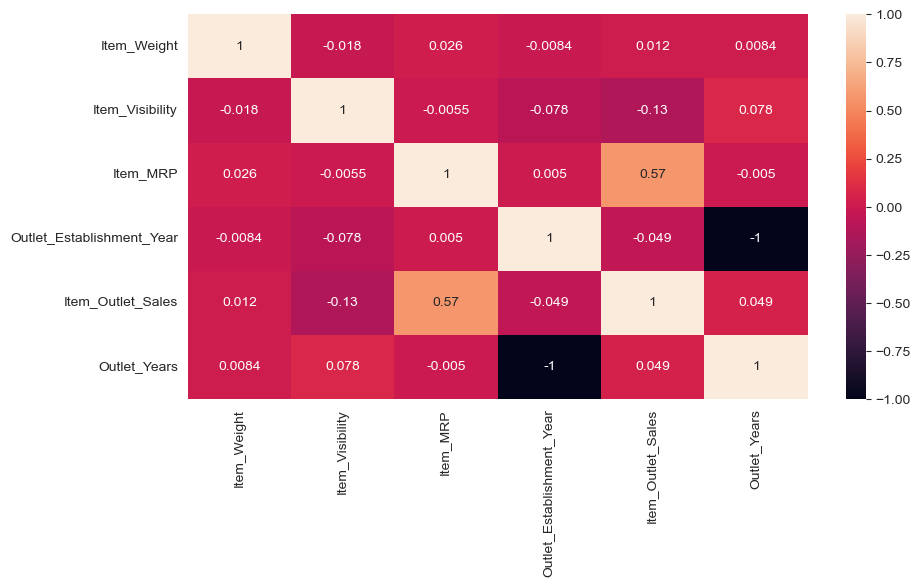

In [266]:
plt.figure(figsize=(10,5))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

# EDA using Klib Library

In [267]:
import klib

GridSpec(6, 5)

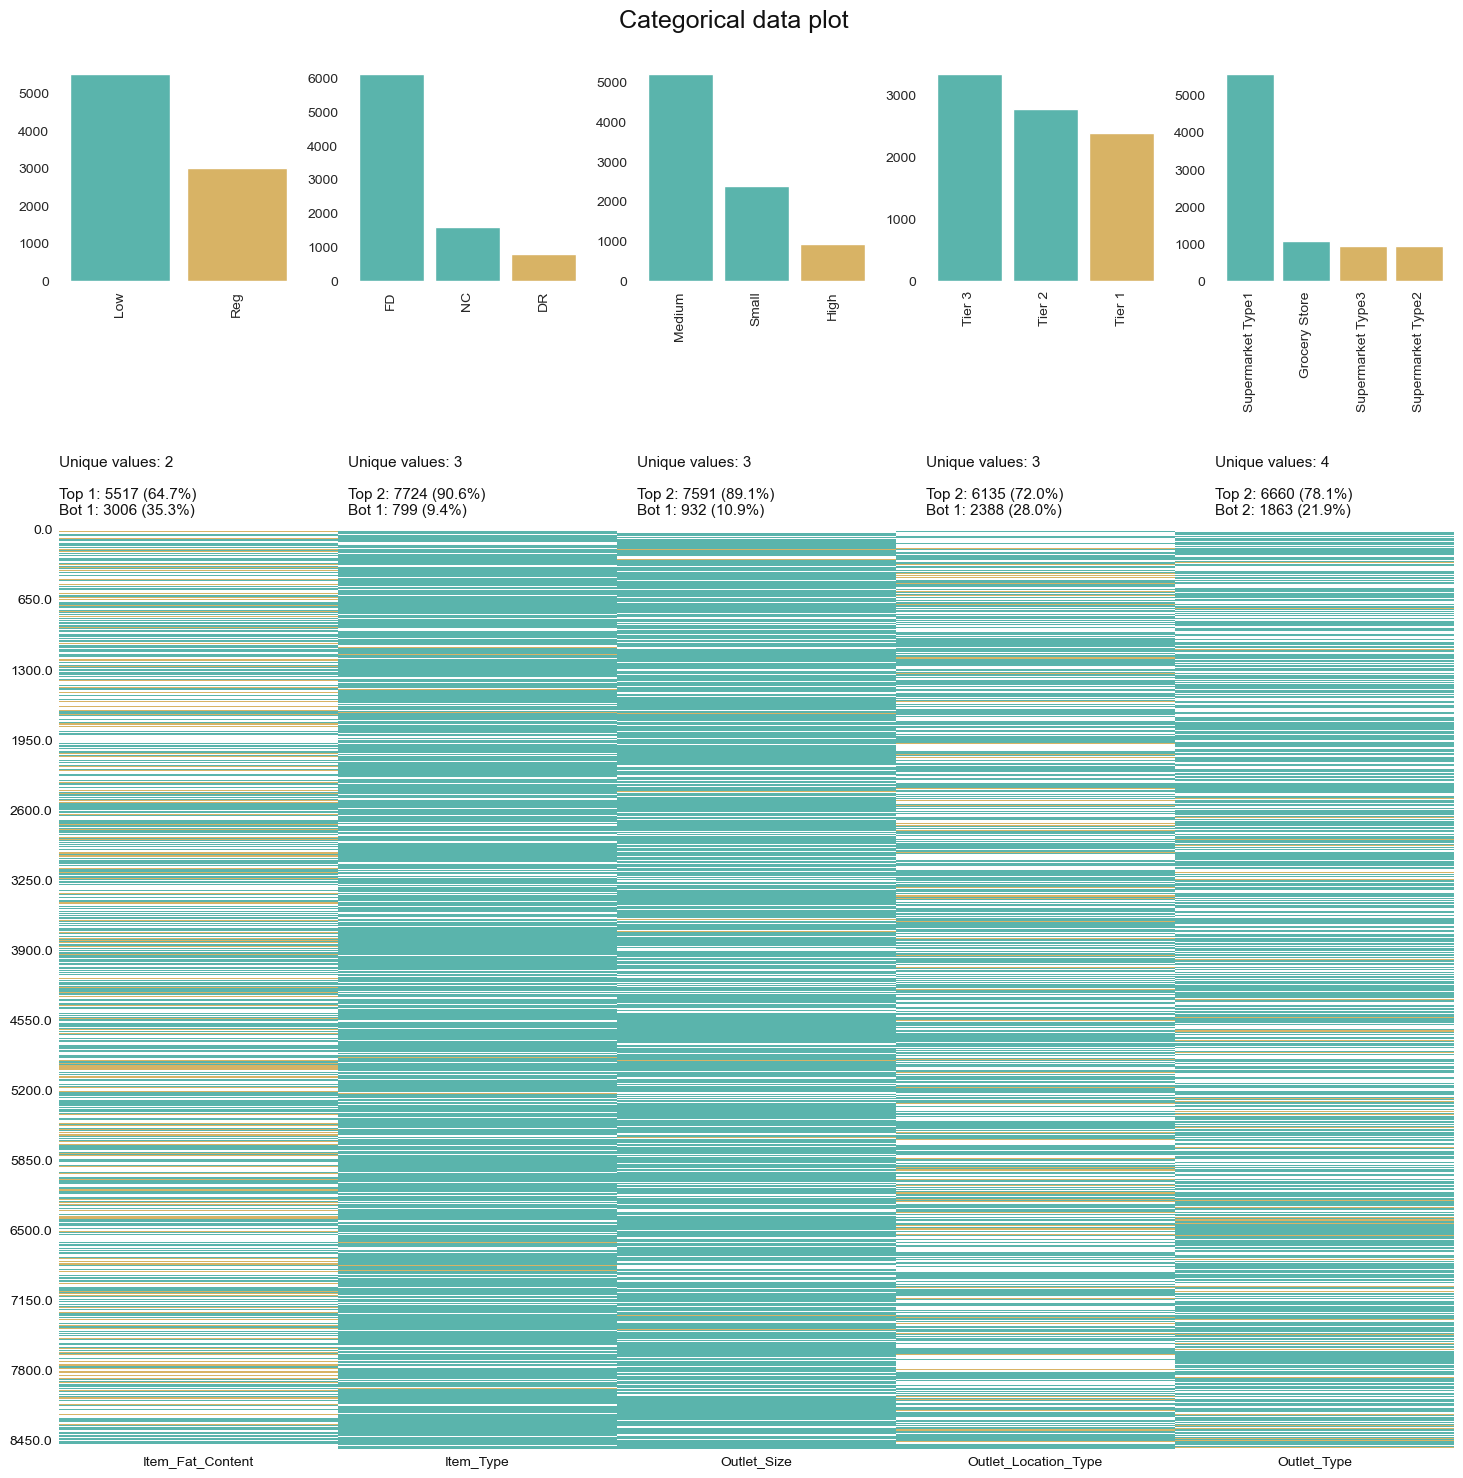

In [268]:
klib.cat_plot(df_train)

In [269]:
klib.corr_mat(df_train)

<Axes: title={'center': 'Feature-correlation (pearson)'}>

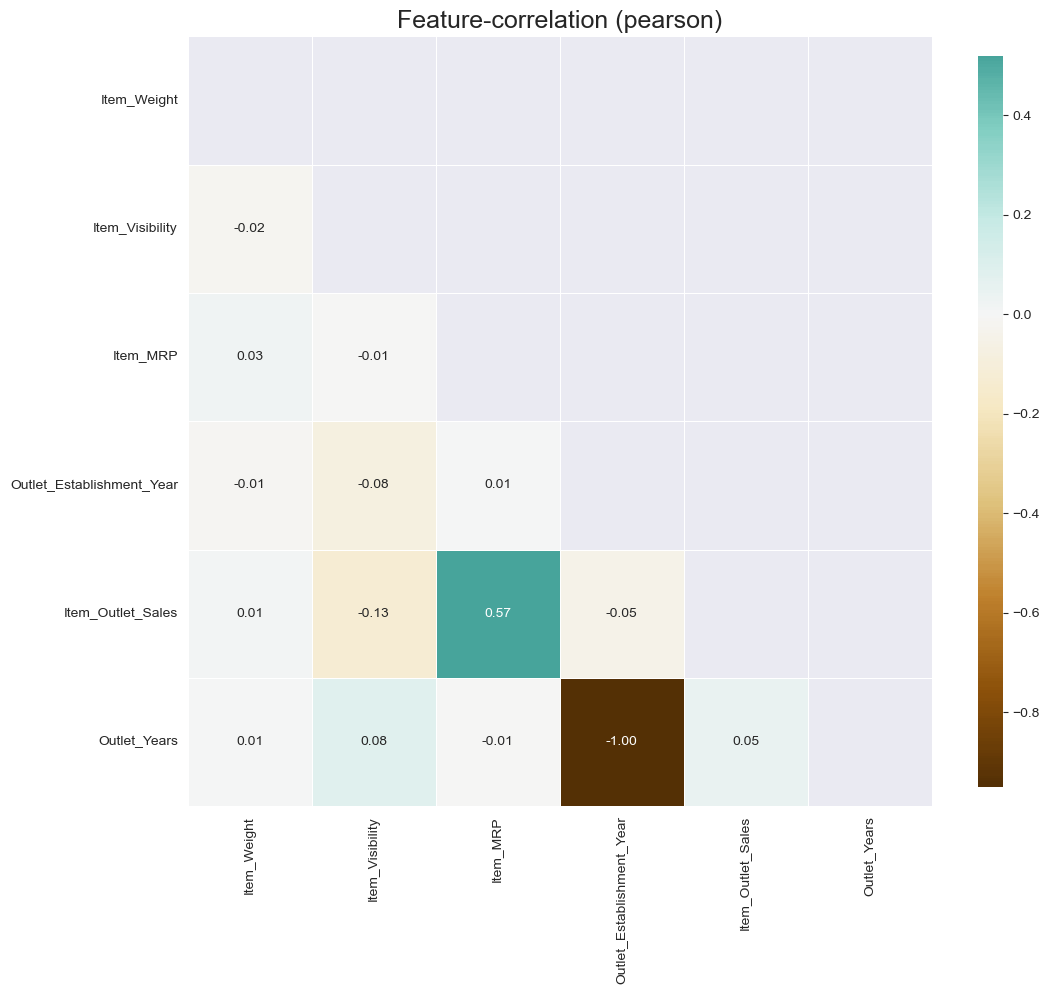

In [270]:
klib.corr_plot(df_train)

<Axes: xlabel='Item_Weight', ylabel='Density'>

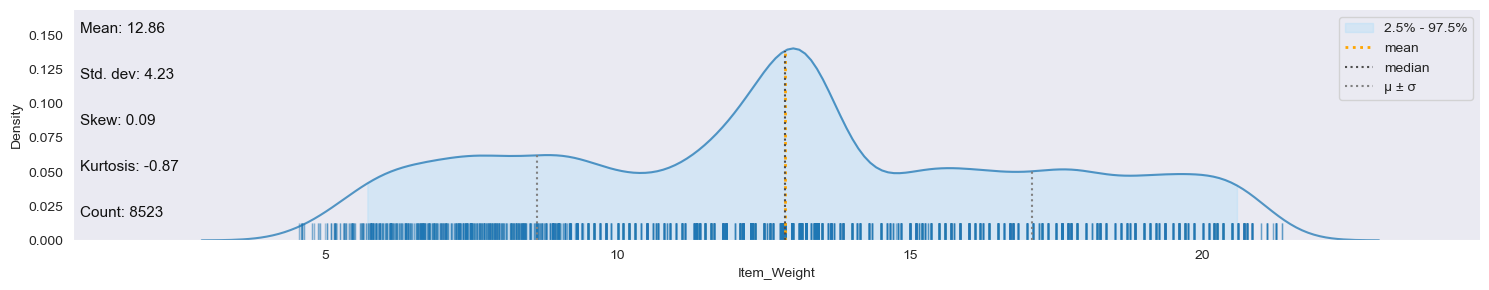

In [271]:
klib.dist_plot(df_train)

In [272]:
klib.missingval_plot(df_train)

No missing values found in the dataset.


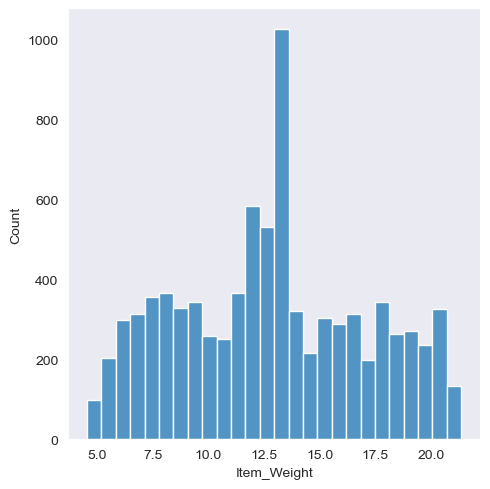

In [273]:
sns.displot(df_train['Item_Weight'])

C:\Users\HP\AppData\Local\Temp\ipykernel_7608\353144755.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Item_Visibility'])


<Axes: xlabel='Item_Visibility', ylabel='Density'>

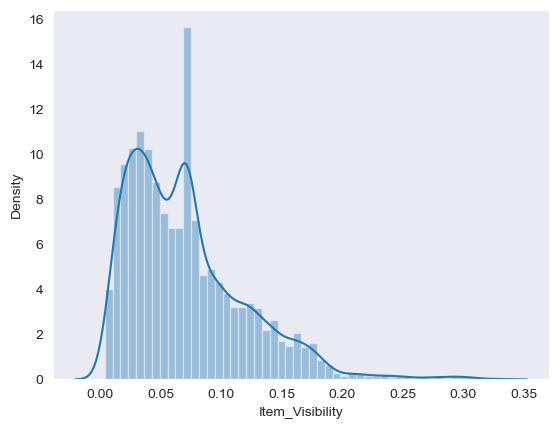

In [274]:
sns.distplot(df_train['Item_Visibility'])

C:\Users\HP\AppData\Local\Temp\ipykernel_7608\2031380158.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Item_MRP'])


<Axes: xlabel='Item_MRP', ylabel='Density'>

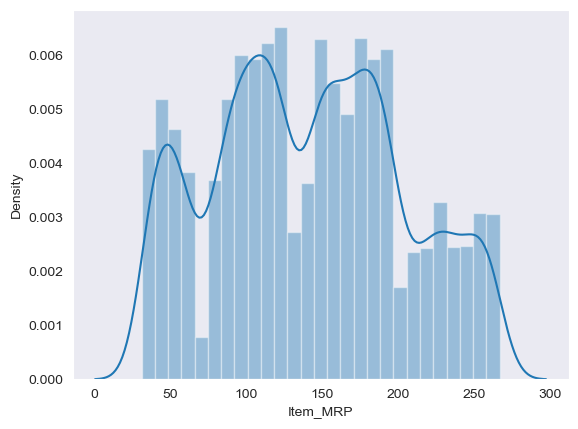

In [275]:
sns.distplot(df_train['Item_MRP'])

C:\Users\HP\AppData\Local\Temp\ipykernel_7608\377595932.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Item_Outlet_Sales'])


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

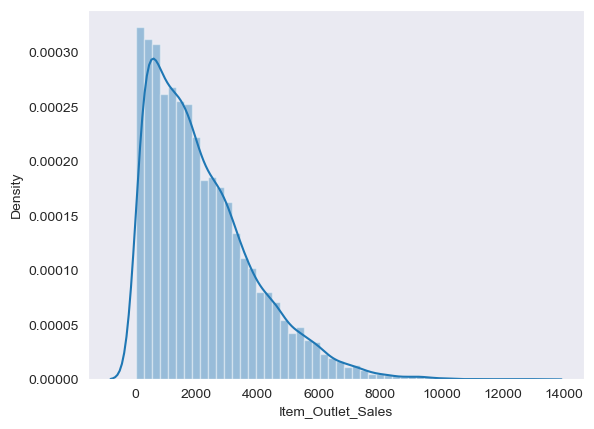

In [276]:
sns.distplot(df_train['Item_Outlet_Sales'])

C:\Users\HP\AppData\Local\Temp\ipykernel_7608\377595932.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Item_Outlet_Sales'])


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

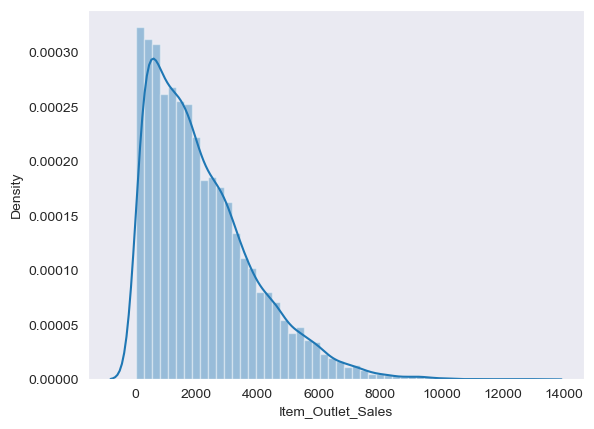

In [277]:
sns.distplot(df_train['Item_Outlet_Sales'])

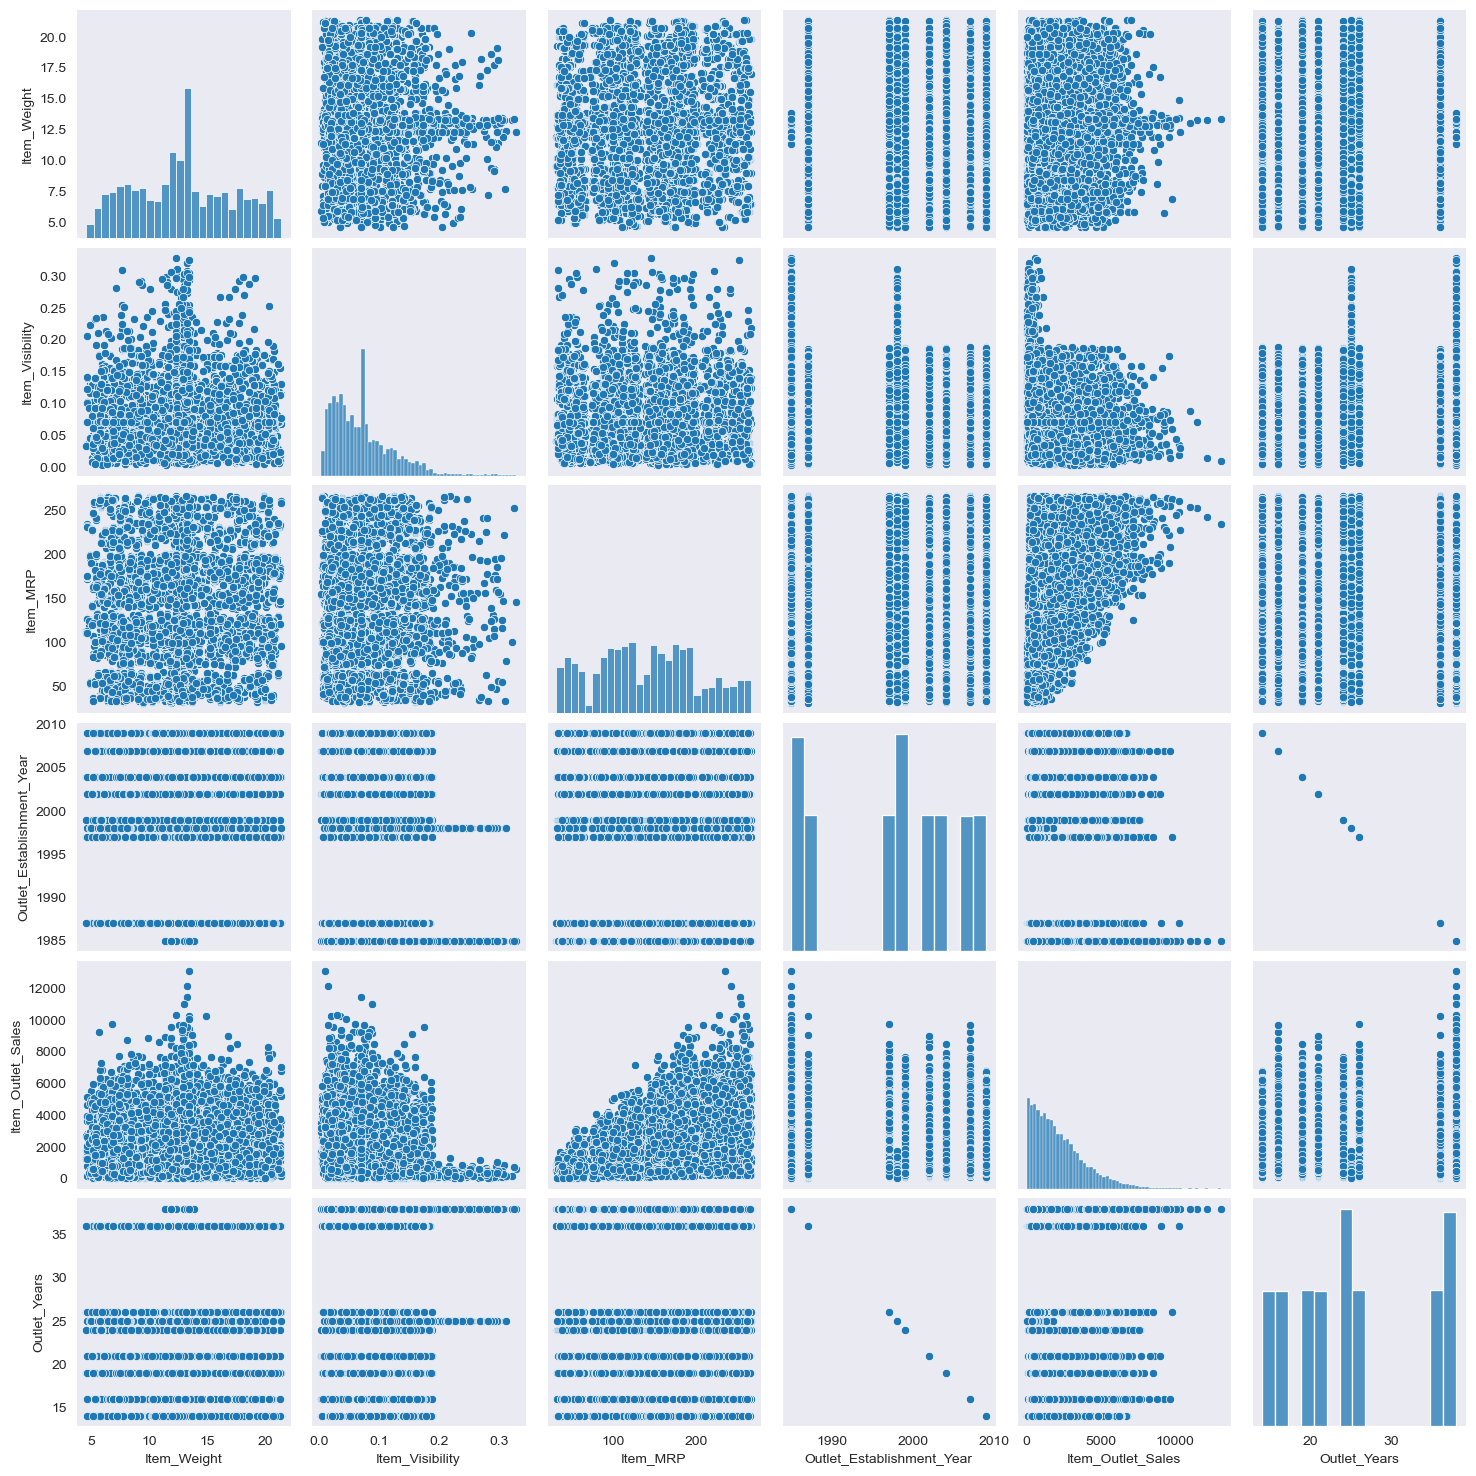

In [278]:
#pairplot
sns.set_style("dark")
sns.pairplot(df_train)

# Preprocessing Task before Model Building

## 1) Label Encoding

In [279]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [280]:
df_train.dtypes

Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Outlet_Years                   int64
dtype: object

In [281]:
df_train['Item_Fat_Content']= le.fit_transform(df_train['Item_Fat_Content'])
df_train['Item_Type']= le.fit_transform(df_train['Item_Type'])
df_train['Outlet_Size']= le.fit_transform(df_train['Outlet_Size'])
df_train['Outlet_Location_Type']= le.fit_transform(df_train['Outlet_Location_Type'])
df_train['Outlet_Type']= le.fit_transform(df_train['Outlet_Type'])

In [282]:
df_train

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0           9.300                 0         0.016047          1  249.8092   
1           5.920                 1         0.019278          0   48.2692   
2          17.500                 0         0.016760          1  141.6180   
3          19.200                 1         0.070482          1  182.0950   
4           8.930                 0         0.070482          2   53.8614   
...           ...               ...              ...        ...       ...   
8518        6.865                 0         0.056783          1  214.5218   
8519        8.380                 1         0.046982          1  108.1570   
8520       10.600                 0         0.035186          2   85.1224   
8521        7.210                 1         0.145221          1  103.1332   
8522       14.800                 0         0.044878          0   75.4670   

      Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  \
0                          1999            1                     0   
1                          2009            1                     2   
2                          1999            1                     0   
3                          1998            1                     2   
4                          1987            0                     2   
...                         ...          ...                   ...   
8518                       1987            0                     2   
8519                       2002            1                     1   
8520                       2004            2                     1   
8521                       2009            1                     2   
8522                       1997            2                     0   

      Outlet_Type  Item_Outlet_Sales  Outlet_Years  
0               1          3735.1380            24  
1               2           443.4228            14  
2               1          2097.2700            24  
3               0           732.3800            25  
4               1           994.7052            36  
...           ...                ...           ...  
8518            1          2778.3834            36  
8519            1           549.2850            21  
8520            1          1193.1136            19  
8521            2          1845.5976            14  
8522            1           765.6700            26  

[8523 rows x 11 columns]

# 2) Splitting our data into train and test

In [283]:
X=df_train.drop('Item_Outlet_Sales',axis=1)

In [284]:
Y=df_train['Item_Outlet_Sales']

In [285]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)

# 3) Standarization 

In [286]:
X.describe()

Item_Weight  Item_Fat_Content  Item_Visibility    Item_Type  \
count  8523.000000       8523.000000      8523.000000  8523.000000   
mean     12.857890          0.352693         0.070482     1.093864   
std       4.232804          0.477836         0.048730     0.522090   
min       4.555000          0.000000         0.003575     0.000000   
25%       9.310000          0.000000         0.033085     1.000000   
50%      12.867061          0.000000         0.062517     1.000000   
75%      16.000000          1.000000         0.094585     1.000000   
max      21.350000          1.000000         0.328391     2.000000   

          Item_MRP  Outlet_Establishment_Year  Outlet_Size  \
count  8523.000000                8523.000000  8523.000000   
mean    140.992782                1997.831867     1.170832   
std      62.275067                   8.371760     0.600327   
min      31.290000                1985.000000     0.000000   
25%      93.826500                1987.000000     1.000000   
50%     143.012800                1999.000000     1.000000   
75%     185.643700                2004.000000     2.000000   
max     266.888400                2009.000000     2.000000   

       Outlet_Location_Type  Outlet_Type  Outlet_Years  
count           8523.000000  8523.000000   8523.000000  
mean               1.112871     1.201220     25.168133  
std                0.812757     0.796459      8.371760  
min                0.000000     0.000000     14.000000  
25%                0.000000     1.000000     19.000000  
50%                1.000000     1.000000     24.000000  
75%                2.000000     1.000000     36.000000  
max                2.000000     3.000000     38.000000

In [287]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [288]:
X_train_std= sc.fit_transform(X_train)

In [289]:
X_test_std= sc.transform(X_test)

In [290]:
X_train_std

array([[ 1.52081307, -0.74155088,  0.63638739, ...,  1.08786619,
        -0.25964107,  1.28565197],
       [-1.23734215, -0.74155088, -0.1890501 , ..., -0.13870429,
        -0.25964107, -1.10135721],
       [ 1.54454934,  1.34852514, -0.0972161 , ..., -0.13870429,
        -0.25964107, -1.10135721],
       ...,
       [-0.08138553, -0.74155088, -1.06123999, ..., -1.36527477,
        -0.25964107,  0.09214738],
       [-0.74718806,  1.34852514,  1.19624416, ..., -0.13870429,
        -0.25964107, -1.10135721],
       [ 0.67817529, -0.74155088,  1.85833762, ...,  1.08786619,
         0.98524841, -1.34005813]])

In [291]:
X_test_std

array([[-0.43742966, -0.74155088, -0.31706609, ...,  1.08786619,
         0.98524841, -1.34005813],
       [ 1.22410962, -0.74155088, -0.64872732, ...,  1.08786619,
        -0.25964107,  1.28565197],
       [-1.2159795 ,  1.34852514,  0.08394985, ..., -1.36527477,
        -0.25964107,  0.09214738],
       ...,
       [ 0.65443901, -0.74155088,  0.84124786, ...,  1.08786619,
        -1.50453056, -0.02720308],
       [ 1.01048314, -0.74155088, -0.00313699, ...,  1.08786619,
         0.98524841, -1.34005813],
       [-1.56252912,  1.34852514, -1.24487442, ..., -0.13870429,
        -0.25964107, -0.50460492]])

In [292]:
Y_train

3684     163.7868
1935    1607.2412
5142    1510.0344
4978    1784.3440
2299    3558.0352
          ...    
599     5502.8370
5695    1436.7964
8006    2167.8448
1361    2700.4848
1547     829.5868
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

In [293]:
Y_test

8179     904.8222
8355    2795.6942
3411    1947.4650
7089     872.8638
6954    2450.1440
          ...    
1317    1721.0930
4996     914.8092
531      370.1848
3891    1358.2320
6629    2418.1856
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

In [294]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [295]:
[variance_inflation_factor(X_train_std,i) for i in range(X_train_std.shape[1])]

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[1.0067272575134756,
 1.032389824643195,
 1.068344032159013,
 1.0382051447424732,
 1.001372085222327,
 inf,
 1.7133204211997808,
 2.054871853071376,
 1.3903089189383666,
 inf]

# Model Building

In [296]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [297]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [298]:
X_test.head()

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
8179        11.00                 0         0.055163          2  100.3358   
8355        18.00                 0         0.038979          1  148.6418   
3411         7.72                 1         0.074731          1   77.5986   
7089        20.70                 0         0.049035          1   39.9506   
6954         7.55                 0         0.027225          1  152.9340   

      Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  \
8179                       2009            1                     2   
8355                       1987            0                     2   
3411                       1997            2                     0   
7089                       2007            1                     1   
6954                       2002            1                     1   

      Outlet_Type  Outlet_Years  
8179            2            14  
8355            1            36  
3411            1            26  
7089            1            16  
6954            1            21

In [299]:
Y_pred_lr=lr.predict(X_test_std)

In [300]:
lr.score(X_train_std,Y_train)

0.5085732632567832

In [301]:
lr.score(X_test_std,Y_test)

0.5037867752541088

In [302]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [303]:
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))


0.5037867752541088
880.70107629317
1162.9110138325652


In [304]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV

In [305]:
lassocv = LassoCV(cv=10,max_iter=200000)
lassocv.fit(X_train_std,Y_train)
lassocv.alpha_

6.001623416438279

In [306]:
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(X_train_std,Y_train)
Y_pred_lasso = lasso.predict(X_test_std)

In [307]:
print(lasso.score(X_train_std,Y_train))
print(lasso.score(X_test_std,Y_test))
print(r2_score(Y_test,Y_pred_lasso))
print(mean_absolute_error(Y_test,Y_pred_lasso))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lasso)))

0.5084024374698581
0.5037848813945569
0.5037848813945569
879.9709391508778
1162.9132330277823


In [308]:
from sklearn.tree import DecisionTreeRegressor

In [309]:
dt_model = DecisionTreeRegressor()

In [310]:
dt_model.fit(X_train_std,Y_train)

DecisionTreeRegressor()

In [311]:
import sklearn
import matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline

In [312]:
dt_model.score(X_train_std,Y_train)

1.0

In [313]:
dt_model.score(X_test_std,Y_test)

0.09541101396494267

# Random Forest Regressor

In [314]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000)

In [315]:
rf.fit(X_train_std,Y_train)

RandomForestRegressor(n_estimators=1000)

In [316]:
rf.score(X_train_std,Y_train)

0.9400799657194161

In [317]:
rf.score(X_test_std,Y_test)

0.5431632572715608

In [318]:
Y_pred_rf= rf.predict(X_test_std)

In [319]:
from sklearn.model_selection import GridSearchCV

In [320]:
grid_params = {
    "criterion":['friedman_mse'],
    "n_estimators":[1000],
    "max_depth":[6],
    "min_samples_leaf":[4],
    "ccp_alpha":range(10),
}

In [321]:
grid_search_rf = GridSearchCV(param_grid = grid_params,cv=10,n_jobs=-1,verbose=1,estimator=rf)

In [322]:
grid_search_rf.fit(X_train_std,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(n_estimators=1000),
             n_jobs=-1,
             param_grid={'ccp_alpha': range(0, 10),
                         'criterion': ['friedman_mse'], 'max_depth': [6],
                         'min_samples_leaf': [4], 'n_estimators': [1000]},
             verbose=1)

In [323]:
grid_search_rf.best_params_

{'ccp_alpha': 4,
 'criterion': 'friedman_mse',
 'max_depth': 6,
 'min_samples_leaf': 4,
 'n_estimators': 1000}

In [332]:
rf_new = RandomForestRegressor(criterion='friedman_mse',max_depth=6,min_samples_leaf=4,n_estimators=1000,ccp_alpha=4)

In [333]:
rf_new.fit(X_train_std,Y_train)

RandomForestRegressor(ccp_alpha=4, criterion='friedman_mse', max_depth=6,
                      min_samples_leaf=4, n_estimators=1000)

In [334]:
Y_train_pred=rf_new.predict(X_train_std)
Y_test_pred=rf_new.predict(X_test_std)

In [335]:
rf_new.score(X_train_std,Y_train)

0.6227580462153419

In [336]:
rf_new.score(X_test_std,Y_test)

0.6003931441886545

In [337]:
print("RMSE :", np.sqrt(((Y_test - Y_test_pred)**2).sum()/len(Y_test)))

RMSE : 1043.5872913028659


In [338]:
print("Accuracy : ",rf_new.score(X_test_std,Y_test))

Accuracy :  0.6003931441886545


# XGBoost Regressor

In [331]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train_std, Y_train)

Y_pred = model.predict(X_test_std)
print(Y_pred)

print("RMSE :", np.sqrt(((Y_test - Y_pred)**2).sum()/len(Y_test)))
print("Train Accuracy : ",model.score(X_train_std,Y_train))
print("Test Accuracy : ",model.score(X_test_std,Y_test))

[1449.97898417 2570.70049809 1301.2222862  ...  491.94982653 1657.53252057
 2429.79795305]
RMSE : 1051.431120420743
Train Accuracy :  0.6370001699810194
Test Accuracy :  0.5943635048596442
